## 智慧選股

#### [資料來源：商周財富網](https://wealth.businessweekly.com.tw/m/GArticle.aspx?id=ARTL003009407)
- 存股條件1：連續10年營業毛利率都＞20%
    - 毛利率＝（（營業收入－營業成本）／營業收入）x100%，比率愈高通常代表公司的獲利能力愈高。

- 存股條件2：近10年中至少8年「營業利益率」＞10%
    - 營業利益率簡稱「營益率」，公式為：營業利益率＝（營業利益／營收）x100%，也就是營業利益占營業收入淨額的比率多寡，代表一家公司利用「本業」的獲利能力，畢竟一家公司透過本業賺錢而非業外收入才是較為正常、健康的情況。

- 存股條件3：近10年中至少8年「股東權益報酬率」＞10%
    - 股東權益報酬率即為財報裡常見的名詞ROE（Return On Equity），公式為：ROE＝（淨收益／ 股東權益）x100%，代表公司利用資本的賺錢效率，一般來說ROE愈高表公司為股東賺進的報酬愈高，是衡量1家企業獲利能力的常見指標之一。

- 存股條件4：連續10年EPS（稅後）為正值
    - 每股盈餘（EPS）公式為「淨收入／在外流通股數」，單位為元，簡單來說，指的是每股能賺進多少錢的意思，同樣是用來衡量公司獲利能力的指標，EPS愈高、表示公司愈會賺錢。不過這邊EPS採的是稅後數值，因為即便一家公司賺很多，但最終還是得繳稅給政府，所以得看「稅後」的數值。

- 存股條件5：「現金殖利率」＞5%
    - 相比上述4點，這項條件對多數人來說應該熟悉很多！現金殖利率＝（現金股利／股價）x100%，通常現金殖利率愈高，能拿到的配息額也會愈多。

- 存股條件6：連續10年配發「現金股利」不間斷
    - 對存股族來說，最重視的因素之一不外乎就是「領息」，因此在配息穩定度上也是非常重要的指標，自然不希望配息中斷的情事發生，因此這邊以至少連續10年配息，當做配息穩定度上的鑑別基準。
    
###  [營益分析查詢彙總表](https://mops.twse.com.tw/mops/web/t163sb06)
- 毛利率(%)大於30
- 營業利益率(%)大於30

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from io import StringIO

#抓取網址
url = 'https://mops.twse.com.tw/mops/web/ajax_t163sb06'
#參數
payload = {
    'encodeURIComponent': 1,
    'step': 1,
    'firstin': 1,
    'off': 1,
    'isQuery': 'Y',
    'TYPEK': 'sii',
    'year': '111',
    'season': 4,
}
#連線抓網頁
res = requests.get(url, params = payload)
#解析網頁
soup = bs(res.text, 'lxml')
#抓取下載檔案名稱
inp = soup.select('input[type=hidden]')

#抓取網址
url = 'https://mops.twse.com.tw/server-java/t105sb02'
#參數
payload = {
    'firstin': 'true',
    'step': 10,
    'filename': ''
}
payload['filename'] = inp[2]['value']
#連線抓檔案
res = requests.get(url, params = payload)
res.encoding = 'big5'
#讀取檔案
df1 = pd.read_csv(StringIO(res.text))
df1.columns = ['公司代號','公司名稱','營業收入','毛利率(%)','營業利益率(%)','稅前純益率(%)','稅後純益率(%)']
df1['公司代號'] = df1['公司代號'].astype(object)
df1

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
0,1101,台泥,113929.71,8.41,1.02,5.83,3.65
1,1102,亞泥,90340.50,13.01,9.49,16.82,13.94
2,1103,嘉泥,2253.66,5.88,-17.54,-5.38,-7.72
3,1104,環泥,7055.79,19.36,11.92,33.78,30.95
4,1108,幸福,4149.25,23.88,17.15,16.58,14.01
...,...,...,...,...,...,...,...
944,9944,新麗,2630.25,26.76,3.77,16.89,9.17
945,9945,潤泰新,32247.18,22.36,15.58,33.37,31.86
946,9946,三發地產,2273.70,17.02,7.70,6.39,6.14
947,9955,佳龍,1161.91,0.12,-8.57,-8.50,-8.50


In [2]:
df1[(df1['毛利率(%)'] > 30) & (df1['營業利益率(%)'] > 30)]

,公司代號,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%)
32,1308,亞聚,9815.33,32.94,30.02,18.52,14.75
65,1437,勤益控,801.87,60.63,51.90,58.39,50.73
66,1438,三地開發,595.27,75.28,69.99,63.88,62.75
226,2059,川湖,7798.63,57.27,48.12,65.05,52.01
238,2114,鑫永銓,1845.96,45.61,32.33,27.94,21.23
257,2303,聯電,278705.26,45.12,37.42,38.07,31.58
271,2330,台積電,2263891.29,59.56,49.53,50.54,44.92
281,2348,海悅,5092.28,44.79,31.39,25.27,17.67
386,2491,吉祥全,-241.43,158.98,221.15,267.10,267.10
403,2524,京城,3384.13,57.77,40.79,34.27,29.84


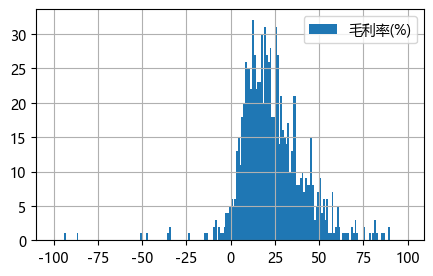

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft Yahei'
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(5, 3))
df1['毛利率(%)'].hist(bins=range(-100,100) , label="毛利率(%)")
plt.legend()
plt.show()

### [財務分析資料查詢彙總表](https://mops.twse.com.tw/mops/web/t51sb02_q1)
- 股東權益報酬率 ＞10%
- EPS（稅後）> 0

In [4]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from io import StringIO

#抓取網址
url = 'https://mops.twse.com.tw/mops/web/ajax_t51sb02'
#參數
payload = {
    'encodeURIComponent': 1,
    'step': 1,
    'firstin': 1,
    'off': 1,
    'TYPEK': 'sii',
    'year': '111',
    'ifrs': 'Y',
    'run': 'Y',
    'isnew': ''
}
#連線抓網頁
res = requests.get(url, params = payload)
#解析網頁
soup = bs(res.text, 'lxml')
#抓取下載檔案名稱
inp = soup.select('input[type=hidden]')

#檔案下載網址
url = 'https://mops.twse.com.tw/server-java/t105sb02'
#參數
payload = {
    'firstin': 'true',
    'step': 10,
    'filename': ''
}
payload['filename'] = inp[-1]['value']
#連線抓檔案
res = requests.get(url, params = payload)
res.encoding = 'big5'
#讀取檔案
df2 = pd.read_csv(StringIO(res.text))
df2

,公司代號,公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),償債能力-速動比率(%),償債能力-利息保障倍數(%),經營能力-應收款項週轉率(次),經營能力-平均收現日數,經營能力-存貨週轉率(次),...,經營能力-不動產、廠房及設備週轉率(次),經營能力-總資產週轉率(次),獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%)
0,1101,台泥,48.29,336.06,233.51,211.47,3.48,3.21,113.70,7.07,...,1.07,0.25,1.40,1.79,9.03,3.65,0.74,8.22,57.53,-0.30
1,1102,亞泥,43.18,636.45,157.05,143.38,12.73,6.36,57.38,8.99,...,2.22,0.28,4.25,6.91,42.86,13.94,3.63,21.57,122.43,1.20
2,1103,嘉泥,39.58,680.24,302.94,294.82,28.41,9.35,39.03,8.80,...,0.44,0.06,-0.10,-0.73,-1.57,-7.72,-0.28,0.00,5.55,0.00
3,1104,環泥,22.59,291.48,118.88,109.97,58.19,3.84,95.05,16.44,...,0.95,0.26,8.39,10.67,36.46,30.94,3.12,21.32,94.90,0.12
4,1108,幸福,49.23,204.18,169.69,45.15,16.62,4.79,76.20,0.82,...,1.37,0.43,6.96,12.17,17.00,14.01,1.44,18.48,53.27,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,9944,新麗,43.58,213.08,219.98,176.99,19.71,6.69,54.55,3.42,...,1.20,0.43,4.39,7.13,40.72,9.17,2.28,14.68,72.71,1.76
986,9945,潤泰新,47.65,2316.46,144.32,57.33,1387.36,12.83,28.44,0.85,...,5.73,0.17,5.68,7.94,34.05,31.86,3.00,18.26,110.12,1.53
987,9946,三發地產,58.30,13305.52,274.14,55.12,187.38,53.33,6.84,0.16,...,29.27,0.15,1.77,2.15,4.45,6.14,0.43,7.25,5.34,1.57
988,9955,佳龍,51.32,97.60,85.50,34.91,-3.91,38.09,9.58,2.26,...,0.57,0.40,-2.88,-6.84,-9.57,-8.50,-0.96,4.35,77.75,1.54


In [5]:
df2[(df2['獲利能力-權益報酬率(%)'] > 10) & (df2['獲利能力-每股盈餘(元)'] > 0)]

,公司代號,公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),償債能力-速動比率(%),償債能力-利息保障倍數(%),經營能力-應收款項週轉率(次),經營能力-平均收現日數,經營能力-存貨週轉率(次),...,經營能力-不動產、廠房及設備週轉率(次),經營能力-總資產週轉率(次),獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%)
3,1104,環泥,22.59,291.48,118.88,109.97,58.19,3.84,95.05,16.44,...,0.95,0.26,8.39,10.67,36.46,30.94,3.12,21.32,94.90,0.12
4,1108,幸福,49.23,204.18,169.69,45.15,16.62,4.79,76.20,0.82,...,1.37,0.43,6.96,12.17,17.00,14.01,1.44,18.48,53.27,2.58
8,1203,味王,34.25,270.94,243.06,136.55,66.70,13.34,27.36,2.57,...,2.18,0.65,9.22,13.86,46.70,13.92,2.63,9.35,76.29,-3.64
9,1210,大成,53.65,158.27,98.25,49.25,7.21,14.12,25.84,8.82,...,5.88,1.90,5.43,10.06,38.29,2.52,2.59,7.68,70.28,4.41
11,1215,卜蜂,64.05,127.05,98.15,63.66,12.38,9.52,38.34,11.03,...,2.21,1.17,6.73,17.15,65.41,5.35,5.28,15.80,39.84,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9939,宏全,57.58,123.11,106.77,71.81,1671.17,6.19,58.96,6.13,...,1.35,0.67,7.00,15.32,98.70,9.22,7.70,28.47,93.23,5.57
981,9940,信義,64.94,494.68,198.68,106.34,11.55,9.36,38.99,0.22,...,1.63,0.41,4.07,10.09,22.56,9.01,1.66,-4.11,145.60,-10.32
982,9941,裕融,86.87,173.59,105.40,102.47,3.57,NaN,NaN,NaN,...,1.64,0.14,3.44,19.94,138.83,16.76,12.06,NaN,8.47,NaN
983,9942,茂順,33.58,255.18,247.70,152.27,159.00,3.08,118.50,2.43,...,2.72,0.82,12.97,19.42,109.19,15.66,7.82,39.18,83.26,1.31


In [39]:
df = pd.merge(df1, df2, left_on = '公司代號', right_on = '公司代號', how='outer')
df['公司代號'] = df['公司代號'].astype(int).astype(object)
df = df.set_index('公司代號')
df = df.dropna()
df

,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),...,經營能力-不動產、廠房及設備週轉率(次),經營能力-總資產週轉率(次),獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%)
公司代號,,,,,,,,,,,,,,,,,,,,,
1101,台泥,113929.71,8.41,1.02,5.83,3.65,台泥,48.29,336.06,233.51,...,1.07,0.25,1.40,1.79,9.03,3.65,0.74,8.22,57.53,-0.30
1102,亞泥,90340.50,13.01,9.49,16.82,13.94,亞泥,43.18,636.45,157.05,...,2.22,0.28,4.25,6.91,42.86,13.94,3.63,21.57,122.43,1.20
1103,嘉泥,2253.66,5.88,-17.54,-5.38,-7.72,嘉泥,39.58,680.24,302.94,...,0.44,0.06,-0.10,-0.73,-1.57,-7.72,-0.28,0.00,5.55,0.00
1104,環泥,7055.79,19.36,11.92,33.78,30.95,環泥,22.59,291.48,118.88,...,0.95,0.26,8.39,10.67,36.46,30.94,3.12,21.32,94.90,0.12
1108,幸福,4149.25,23.88,17.15,16.58,14.01,幸福,49.23,204.18,169.69,...,1.37,0.43,6.96,12.17,17.00,14.01,1.44,18.48,53.27,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,新麗,2630.25,26.76,3.77,16.89,9.17,新麗,43.58,213.08,219.98,...,1.20,0.43,4.39,7.13,40.72,9.17,2.28,14.68,72.71,1.76
9945,潤泰新,32247.18,22.36,15.58,33.37,31.86,潤泰新,47.65,2316.46,144.32,...,5.73,0.17,5.68,7.94,34.05,31.86,3.00,18.26,110.12,1.53
9946,三發地產,2273.70,17.02,7.70,6.39,6.14,三發地產,58.30,13305.52,274.14,...,29.27,0.15,1.77,2.15,4.45,6.14,0.43,7.25,5.34,1.57


#### 綜合選股條件
- 毛利率(%)大於30
- 營業利益率(%)大於30
- 股東權益報酬率 ＞10%
- EPS（稅後）> 0

In [40]:
df = df[(df['毛利率(%)'] > 30) &
   (df['營業利益率(%)'] > 30) & 
   (df['獲利能力-權益報酬率(%)'] > 10) &
   (df['獲利能力-每股盈餘(元)'] > 0)]
df

,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),...,經營能力-不動產、廠房及設備週轉率(次),經營能力-總資產週轉率(次),獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%)
公司代號,,,,,,,,,,,,,,,,,,,,,
2059,川湖,7798.63,57.27,48.12,65.05,52.01,川湖,18.70,548.12,786.61,...,2.63,0.40,23.44,28.72,532.36,52.01,42.56,199.61,166.91,15.38
2114,鑫永銓,1845.96,45.61,32.33,27.94,21.23,鑫永銓,15.85,252.13,567.36,...,1.56,0.50,10.81,12.75,66.13,21.23,5.03,218.77,102.16,6.36
2303,聯電,278705.26,45.12,37.42,38.07,31.58,聯電,37.07,219.51,232.46,...,1.85,0.56,17.93,28.31,84.19,31.58,7.09,134.35,139.90,8.32
2330,台積電,2263891.29,59.56,49.53,50.54,44.92,台積電,40.37,149.25,217.42,...,0.97,0.52,23.64,39.76,441.25,44.92,39.20,170.57,101.82,17.25
2348,海悅,5092.28,44.79,31.39,25.27,17.67,海悅,74.82,43127.34,292.99,...,106.58,0.21,4.19,17.12,87.47,17.67,7.88,-18.38,-53.53,-13.09
2534,宏盛,6968.15,43.05,31.21,29.17,28.20,宏盛,51.42,1063455.39,157.35,...,2892.55,0.22,6.69,13.85,42.87,28.20,4.15,43.37,115.09,19.12
2539,櫻花建,6263.95,36.18,30.76,30.57,24.03,櫻花建,52.48,24845.42,262.94,...,119.47,0.30,7.18,16.32,26.03,24.03,2.05,14.30,27.57,7.71
2637,慧洋-KY,24913.01,47.00,46.04,42.50,42.42,慧洋-KY,49.95,108.95,88.71,...,0.33,0.26,13.41,25.74,141.86,42.42,14.16,136.20,137.62,9.50
3008,大立光,47675.23,54.71,42.76,58.37,47.46,大立光,16.14,411.25,439.64,...,1.31,0.27,12.58,15.24,2084.89,47.46,169.52,150.43,160.01,16.06


### [公司股利分派公告資料彙總表](https://mops.twse.com.tw/mops/web/t108sb27)

In [36]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from io import StringIO

#抓取網址
url = 'https://mops.twse.com.tw/mops/web/ajax_t108sb27'
#參數
payload = {
    'encodeURIComponent': 1,
    'step': 1,
    'firstin': 1,
    'off': 1,
    'TYPEK': 'sii',
    'year': '112',
    'keyword4':'',
    'code1': '',
    'TYPEK2': '',
    'checkbtn': '',
    'queryName':'',
    'co_id_1': '',
    'co_id_2': '',
    'month': '',
    'b_date': '',
    'e_date':'',
    'type': ''
}
#連線抓網頁
res = requests.get(url, params = payload)
#解析網頁
soup = bs(res.text, 'lxml')
#抓取下載檔案名稱
inp = soup.select('input[type=hidden]')

#檔案下載網址
url = 'https://mops.twse.com.tw/server-java/t105sb02'
#參數
payload = {
    'firstin': 'true',
    'step': 10,
    'filename': ''
}
payload['filename'] = inp[-1]['value']
#連線抓檔案
res = requests.get(url, params = payload)
res.encoding = 'big5'
#讀取檔案
df0 = pd.read_csv(StringIO(res.text))
df0 = df0[['公司代號', '公司名稱', '現金股利-盈餘分配之股東現金股利(元/股)']]
df0 = df0[df0['公司代號']!= '公司代號']
#df0 = df0.set_index('公司代號')
df0

,公司代號,公司名稱,現金股利-盈餘分配之股東現金股利(元/股)
0,1101,台泥,0.49971973
1,1101B,特別股B,-
2,1102,亞泥,2.29958798
3,1103,嘉泥,0.30000000
4,1104,環泥,1.50000000
...,...,...,...
756,9941,裕融,5.60000000
757,9941A,特別股A,-
758,9942,茂順,5.60000000
759,9943,好樂迪,3.30000000


In [41]:
#針對季、半年發放的股票作加總
df0 = df0[df0['現金股利-盈餘分配之股東現金股利(元/股)'] != '-']
df0['現金股利-盈餘分配之股東現金股利(元/股)'] = df0['現金股利-盈餘分配之股東現金股利(元/股)'].astype(float)
df3 = df0.groupby('公司代號').agg(現金股利=('現金股利-盈餘分配之股東現金股利(元/股)',sum))
df3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,現金股利
公司代號,
1101,0.499720
1102,2.299588
1103,0.300000
1104,1.500000
1109,0.800000
...,...
9940,1.200000
9941,5.600000
9942,5.600000


In [51]:
l = []
for i in df.index:
    if '{}'.format(i) in df3.index:        
        l.append(df3.loc['{}'.format(i), '現金股利'])
    else:
        l.append('')
df['現金股利'] = l
df

,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),...,經營能力-總資產週轉率(次),獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%),現金股利
公司代號,,,,,,,,,,,,,,,,,,,,,
2059,川湖,7798.63,57.27,48.12,65.05,52.01,川湖,18.70,548.12,786.61,...,0.40,23.44,28.72,532.36,52.01,42.56,199.61,166.91,15.38,
2114,鑫永銓,1845.96,45.61,32.33,27.94,21.23,鑫永銓,15.85,252.13,567.36,...,0.50,10.81,12.75,66.13,21.23,5.03,218.77,102.16,6.36,5
2303,聯電,278705.26,45.12,37.42,38.07,31.58,聯電,37.07,219.51,232.46,...,0.56,17.93,28.31,84.19,31.58,7.09,134.35,139.90,8.32,3.60046
2330,台積電,2263891.29,59.56,49.53,50.54,44.92,台積電,40.37,149.25,217.42,...,0.52,23.64,39.76,441.25,44.92,39.20,170.57,101.82,17.25,5.49964
2348,海悅,5092.28,44.79,31.39,25.27,17.67,海悅,74.82,43127.34,292.99,...,0.21,4.19,17.12,87.47,17.67,7.88,-18.38,-53.53,-13.09,5
2534,宏盛,6968.15,43.05,31.21,29.17,28.20,宏盛,51.42,1063455.39,157.35,...,0.22,6.69,13.85,42.87,28.20,4.15,43.37,115.09,19.12,1.75
2539,櫻花建,6263.95,36.18,30.76,30.57,24.03,櫻花建,52.48,24845.42,262.94,...,0.30,7.18,16.32,26.03,24.03,2.05,14.30,27.57,7.71,
2637,慧洋-KY,24913.01,47.00,46.04,42.50,42.42,慧洋-KY,49.95,108.95,88.71,...,0.26,13.41,25.74,141.86,42.42,14.16,136.20,137.62,9.50,6.5
3008,大立光,47675.23,54.71,42.76,58.37,47.46,大立光,16.14,411.25,439.64,...,0.27,12.58,15.24,2084.89,47.46,169.52,150.43,160.01,16.06,72.5


### [每日收盤行情](https://www.twse.com.tw/zh/trading/historical/mi-index.html)

In [12]:
import requests
import pandas as pd

#網址
url = 'https://www.twse.com.tw/rwd/zh/afterTrading/MI_INDEX?date=20230807&type=ALL&response=json&_=1691465555860'
#連線抓資料
res = requests.get(url).json()
#資料處理
df4 = pd.DataFrame(res['tables'][8]['data'], columns = res['tables'][8]['fields'])
#挑選資料
df4 = df4[['證券代號', '證券名稱', '收盤價']]
#df3.columns = ['公司代號', '公司名稱', '收盤價']
df4 = df4.set_index('證券代號')
df4

,證券名稱,收盤價
證券代號,,
0050,元大台灣50,128.50
0051,元大中型100,71.70
0052,富邦科技,118.30
0053,元大電子,68.85
0055,元大MSCI金融,24.12
...,...,...
9944,新麗,21.05
9945,潤泰新,35.15
9946,三發地產,14.10


In [52]:
l = []
for i in df.index:
    if '{}'.format(i) in df4.index:
        l.append(df4.loc['{}'.format(i), '收盤價'])
    else:
        l.append('')
df['收盤價'] = l
df

,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),...,獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%),現金股利,收盤價
公司代號,,,,,,,,,,,,,,,,,,,,,
2059,川湖,7798.63,57.27,48.12,65.05,52.01,川湖,18.70,548.12,786.61,...,23.44,28.72,532.36,52.01,42.56,199.61,166.91,15.38,,877.00
2114,鑫永銓,1845.96,45.61,32.33,27.94,21.23,鑫永銓,15.85,252.13,567.36,...,10.81,12.75,66.13,21.23,5.03,218.77,102.16,6.36,5,101.50
2303,聯電,278705.26,45.12,37.42,38.07,31.58,聯電,37.07,219.51,232.46,...,17.93,28.31,84.19,31.58,7.09,134.35,139.90,8.32,3.60046,46.40
2330,台積電,2263891.29,59.56,49.53,50.54,44.92,台積電,40.37,149.25,217.42,...,23.64,39.76,441.25,44.92,39.20,170.57,101.82,17.25,5.49964,558.00
2348,海悅,5092.28,44.79,31.39,25.27,17.67,海悅,74.82,43127.34,292.99,...,4.19,17.12,87.47,17.67,7.88,-18.38,-53.53,-13.09,5,66.10
2534,宏盛,6968.15,43.05,31.21,29.17,28.20,宏盛,51.42,1063455.39,157.35,...,6.69,13.85,42.87,28.20,4.15,43.37,115.09,19.12,1.75,20.10
2539,櫻花建,6263.95,36.18,30.76,30.57,24.03,櫻花建,52.48,24845.42,262.94,...,7.18,16.32,26.03,24.03,2.05,14.30,27.57,7.71,,49.10
2637,慧洋-KY,24913.01,47.00,46.04,42.50,42.42,慧洋-KY,49.95,108.95,88.71,...,13.41,25.74,141.86,42.42,14.16,136.20,137.62,9.50,6.5,46.90
3008,大立光,47675.23,54.71,42.76,58.37,47.46,大立光,16.14,411.25,439.64,...,12.58,15.24,2084.89,47.46,169.52,150.43,160.01,16.06,72.5,"2,150.00"


In [53]:
df[['現金股利', '收盤價']] = df[['現金股利', '收盤價']].apply(pd.to_numeric, errors = 'coerce')
df

,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),...,獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%),現金股利,收盤價
公司代號,,,,,,,,,,,,,,,,,,,,,
2059,川湖,7798.63,57.27,48.12,65.05,52.01,川湖,18.70,548.12,786.61,...,23.44,28.72,532.36,52.01,42.56,199.61,166.91,15.38,NaN,877.00
2114,鑫永銓,1845.96,45.61,32.33,27.94,21.23,鑫永銓,15.85,252.13,567.36,...,10.81,12.75,66.13,21.23,5.03,218.77,102.16,6.36,5.000000,101.50
2303,聯電,278705.26,45.12,37.42,38.07,31.58,聯電,37.07,219.51,232.46,...,17.93,28.31,84.19,31.58,7.09,134.35,139.90,8.32,3.600463,46.40
2330,台積電,2263891.29,59.56,49.53,50.54,44.92,台積電,40.37,149.25,217.42,...,23.64,39.76,441.25,44.92,39.20,170.57,101.82,17.25,5.499641,558.00
2348,海悅,5092.28,44.79,31.39,25.27,17.67,海悅,74.82,43127.34,292.99,...,4.19,17.12,87.47,17.67,7.88,-18.38,-53.53,-13.09,5.000000,66.10
2534,宏盛,6968.15,43.05,31.21,29.17,28.20,宏盛,51.42,1063455.39,157.35,...,6.69,13.85,42.87,28.20,4.15,43.37,115.09,19.12,1.750000,20.10
2539,櫻花建,6263.95,36.18,30.76,30.57,24.03,櫻花建,52.48,24845.42,262.94,...,7.18,16.32,26.03,24.03,2.05,14.30,27.57,7.71,NaN,49.10
2637,慧洋-KY,24913.01,47.00,46.04,42.50,42.42,慧洋-KY,49.95,108.95,88.71,...,13.41,25.74,141.86,42.42,14.16,136.20,137.62,9.50,6.500000,46.90
3008,大立光,47675.23,54.71,42.76,58.37,47.46,大立光,16.14,411.25,439.64,...,12.58,15.24,2084.89,47.46,169.52,150.43,160.01,16.06,72.500000,NaN


In [54]:
df['現金殖利率'] = df['現金股利'] / df['收盤價']*100
df[df['現金殖利率'] > 5]

,公司名稱,營業收入,毛利率(%),營業利益率(%),稅前純益率(%),稅後純益率(%),公司簡稱,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),...,獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投<br>資比率(%),現金股利,收盤價,現金殖利率
公司代號,,,,,,,,,,,,,,,,,,,,,
2303,聯電,278705.26,45.12,37.42,38.07,31.58,聯電,37.07,219.51,232.46,...,28.31,84.19,31.58,7.09,134.35,139.90,8.32,3.600463,46.40,7.759620
2348,海悅,5092.28,44.79,31.39,25.27,17.67,海悅,74.82,43127.34,292.99,...,17.12,87.47,17.67,7.88,-18.38,-53.53,-13.09,5.000000,66.10,7.564297
2534,宏盛,6968.15,43.05,31.21,29.17,28.20,宏盛,51.42,1063455.39,157.35,...,13.85,42.87,28.20,4.15,43.37,115.09,19.12,1.750000,20.10,8.706468
2637,慧洋-KY,24913.01,47.00,46.04,42.50,42.42,慧洋-KY,49.95,108.95,88.71,...,25.74,141.86,42.42,14.16,136.20,137.62,9.50,6.500000,46.90,13.859275
3030,德律,6708.83,57.37,32.10,36.58,28.64,德律,20.78,240.80,375.00,...,28.76,103.88,28.64,8.13,91.73,89.50,8.21,4.500000,60.00,7.500000
3056,總太,8697.51,34.49,30.91,31.17,25.40,總太,63.59,7483.11,182.49,...,35.28,111.66,25.39,9.81,42.05,0.00,43.39,4.100000,51.70,7.930368
5608,四維航,6715.81,47.21,42.12,36.20,28.80,四維航,59.34,99.86,97.08,...,22.46,65.83,28.80,6.08,60.62,492.95,9.53,1.500000,19.25,7.792208
6184,大豐電,2013.07,51.34,31.41,31.13,25.62,大豐電,43.37,223.19,81.55,...,11.79,39.60,25.62,3.48,36.32,149.91,20.61,2.950000,50.70,5.818540
6464,台數科,4358.96,51.85,33.29,26.71,20.66,台數科,55.87,933.80,104.53,...,10.92,88.45,20.66,6.66,65.23,157.53,14.06,5.000000,88.50,5.649718
